<a href="https://colab.research.google.com/github/SasankaPasanjith/Heart-Disease-Prediction-Using-Machine-Learning/blob/main/Heart_Disease_Prediction_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
import os
from google.colab import files


In [8]:
uploaded = files.upload()


Saving heart.csv to heart (1).csv


**Imoprt data**

In [9]:
data = pd.read_csv("heart.csv")

In [10]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [11]:
#Columns & row count
data.shape

(1025, 14)

In [12]:
#Column vise null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
#Data set information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [14]:
#Summery of data set
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
#targetwise Count of the dataset
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

1 = Patient has Heart Disease

>


0 = Patient does not has Heart Disease


In [16]:
#Percentage of the target column distribution
data['target'].value_counts()*100/data.shape[0]

1    51.317073
0    48.682927
Name: target, dtype: float64

Text(0.5, 1.0, 'Heart Disease Distribution')

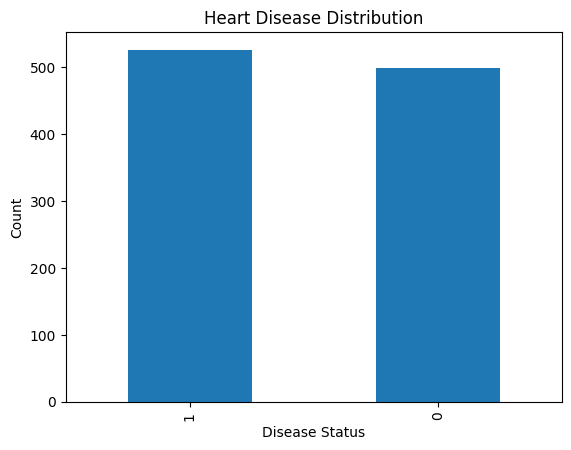

In [17]:
plt = data.target.value_counts().plot(kind='bar')
plt.set_xlabel('Disease Status')
plt.set_ylabel('Count')
plt.set_title('Heart Disease Distribution')

In [18]:
#Checking target variable distribution
x = data.drop(columns='target', axis=1)
y = data['target']

In [19]:
print(x)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [20]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


**Data Spliting to train & test**

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y ,random_state=111222)

In [22]:
#Training data count
x_train.shape

(820, 13)

In [23]:
#Testing data count
x_test.shape

(205, 13)

**Train Model**

In [24]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

>
Logistic Regression



In [25]:
from sklearn.metrics import accuracy_score

In [26]:
#Training data accuracy
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [27]:
print('Training data accuracy = ',training_data_accuracy)

Training data accuracy =  0.8329268292682926


In [28]:
#Test data accuracy
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [29]:
print('Testing data accuracy = ',test_data_accuracy)

Testing data accuracy =  0.8829268292682927


In [30]:
from sklearn.metrics import accuracy_score #Computes the accuracy of the model
from sklearn.metrics import precision_score #Computes precision
from sklearn.metrics import recall_score #Computes recall (sensitivity or true positive rate)
from sklearn.metrics import f1_score  #combination of precision & recall (Average)

def check_accuracy(y_test, pred):
    print("Accuracy  : {:2f}%".format(accuracy_score(y_test,pred)*100))
    print("Precision : {:2f}%".format(precision_score(y_test,pred)*100))
    print("Recall    : {:2f}%".format(recall_score(y_test,pred)*100))
    print("F1        : {:2f}%".format(f1_score(y_test,pred)*100))
    print("==================================================")

In [31]:
predictions = model.predict(x_test)

In [32]:
check_accuracy(y_test, predictions)

Accuracy  : 88.292683%
Precision : 85.840708%
Recall    : 92.380952%
F1        : 88.990826%


Disease Prediction

In [33]:
input_data = (64,1,3,110,211,0,0,144,1,1.8,1,0,2)

#Change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the numpy array for predicting only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Patient does not has heart related disease.')
else:
     print('The Patient has heart related disease.')

[1]
The Patient has heart related disease.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
